# **MILESTONE 1 i 2**


## **Cel biznesowy:** Segmentacja klientów banku na podstawie ich zachowań transakcyjnych i typów kont w celu personalizacji ofert marketingowych i zwiększenia retencji klientów

**Korzyści wynikające dla banku z racji takiego pogrupowania klientów:**

- Możliwość kierowania odpowiednich ofert do odpowiednich klientów (np. lokaty dla klientów z dużym saldem).

- Identyfikacja klientów wysokiego ryzyka lub niskiej aktywności.

- Możliwość tworzenia kampanii retencyjnych dla segmentów o niskim zaangażowaniu.

### Wczytanie ramki danych

In [1311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/banking_dataset.csv")

## **Eksploracja i wstępna analiza danych**

In [1312]:
df.head()

,,Account ID;Customer Name;Account Type;Branch;Transaction Type;Transaction Amount;Account Balance;Currency
ACC00001;Amanda Pugh;Recurring Deposit;New York;Debit;2687,19;36676,19;GBP
ACC00002;Amanda Wilcox;Recurring Deposit;Houston;Debit;3886,77;28582,82;USD
ACC00003;Kimberly Valenzuela;Current;New York;Credit;2438,74;76599,56;GBP
ACC00004;Sonia Ballard;Recurring Deposit;Philadelphia;Credit;2758,53;62317,6;INR
ACC00005;Erika Russell;Current;Philadelphia;Debit;3287;85515,21;INR,NaN


Widzimy, że ramka danych po zapisaniu w pliku csv, nie ładuje się dobrze. Na szczęście jest na to rozwiązanie:

In [1313]:
df = pd.read_csv("data/banking_dataset.csv", sep=";")


In [1314]:
df.head()

,Account ID,Customer Name,Account Type,Branch,Transaction Type,Transaction Amount,Account Balance,Currency
0,ACC00001,Amanda Pugh,Recurring Deposit,New York,Debit,"2687,19","36676,19",GBP
1,ACC00002,Amanda Wilcox,Recurring Deposit,Houston,Debit,"3886,77","28582,82",USD
2,ACC00003,Kimberly Valenzuela,Current,New York,Credit,"2438,74","76599,56",GBP
3,ACC00004,Sonia Ballard,Recurring Deposit,Philadelphia,Credit,"2758,53","62317,6",INR
4,ACC00005,Erika Russell,Current,Philadelphia,Debit,3287,"85515,21",INR


In [1315]:
df.tail()

,Account ID,Customer Name,Account Type,Branch,Transaction Type,Transaction Amount,Account Balance,Currency
9995,ACC09996,Richard Davis,Fixed Deposit,New York,Debit,"400,96","38035,17",USD
9996,ACC09997,Lauren Weber,Savings,Chicago,Debit,"3736,7","60682,41",EUR
9997,ACC09998,Nichole Stout,Fixed Deposit,Houston,Credit,"4002,91","36136,11",USD
9998,ACC09999,Kristen Wilkinson,Fixed Deposit,Philadelphia,Debit,"866,9","35644,82",GBP
9999,ACC10000,Brian Sandoval,Fixed Deposit,Philadelphia,Debit,"3932,81","32357,51",GBP


In [1316]:
df.shape

(10000, 8)

In [1317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Account ID          10000 non-null  object
 1   Customer Name       10000 non-null  object
 2   Account Type        10000 non-null  object
 3   Branch              10000 non-null  object
 4   Transaction Type    10000 non-null  object
 5   Transaction Amount  10000 non-null  object
 6   Account Balance     10000 non-null  object
 7   Currency            10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


wszysktie kolumny są typu object - trzeba będzie to zmienić 

In [1318]:
print(df.isnull().sum())

Account ID            0
Customer Name         0
Account Type          0
Branch                0
Transaction Type      0
Transaction Amount    0
Account Balance       0
Currency              0
dtype: int64


Brak pustych wartości

In [1319]:
df.describe()

,Account ID,Customer Name,Account Type,Branch,Transaction Type,Transaction Amount,Account Balance,Currency
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,9323,4,8,2,9896,9995,5
top,ACC00001,William Williams,Savings,Philadelphia,Credit,"3398,97","21317,69",JPY
freq,1,7,2580,1288,5114,3,2,2041


## Po wstępnej analizie kolumn, usunięte zostaną kolumny 'Account ID' oraz 'Customer Name', są to informacje, które nie wnoszą żadnej informacji

In [1320]:
df = df.drop(['Account ID', 'Customer Name'], axis = 1)

In [1321]:
df.head()

,Account Type,Branch,Transaction Type,Transaction Amount,Account Balance,Currency
0,Recurring Deposit,New York,Debit,"2687,19","36676,19",GBP
1,Recurring Deposit,Houston,Debit,"3886,77","28582,82",USD
2,Current,New York,Credit,"2438,74","76599,56",GBP
3,Recurring Deposit,Philadelphia,Credit,"2758,53","62317,6",INR
4,Current,Philadelphia,Debit,3287,"85515,21",INR


In [1322]:
 df.drop_duplicates(inplace=True)

Możemy teraz przejść do dalszej eksploracji danych, najpierw zmieńmy typy danych w kolumnach, aby móc operować na zmiennych liczbowych

In [1323]:
#df['Transaction Amount'] = pd.to_numeric(df['Transaction Amount'], errors='coerce')
#df['Account Balance'] = pd.to_numeric(df['Account Balance'], errors='coerce')

df['Transaction Amount'] = df['Transaction Amount'].str.replace(',', '.').astype(float)
df['Account Balance'] = df['Account Balance'].str.replace(',', '.').astype(float)

^ tutaj był błąd, zakomentowany kod psuł tabelę

Sprawdźmy unikalne wartości i ich ilość dla poszczególnych kolumn

In [1324]:
print(df.dtypes)

Account Type           object
Branch                 object
Transaction Type       object
Transaction Amount    float64
Account Balance       float64
Currency               object
dtype: object


In [1325]:

for col in ['Account Type', 'Branch', 'Transaction Type', 'Currency']:
    print(f"\nUnikalne wartości w kolumnie {col}:")
    print(df[col].value_counts())


Unikalne wartości w kolumnie Account Type:
Account Type
Savings              2580
Current              2529
Fixed Deposit        2489
Recurring Deposit    2402
Name: count, dtype: int64

Unikalne wartości w kolumnie Branch:
Branch
Philadelphia    1288
Phoenix         1274
Los Angeles     1268
Houston         1259
New York        1256
Chicago         1239
San Antonio     1233
San Diego       1183
Name: count, dtype: int64

Unikalne wartości w kolumnie Transaction Type:
Transaction Type
Credit    5114
Debit     4886
Name: count, dtype: int64

Unikalne wartości w kolumnie Currency:
Currency
JPY    2041
EUR    2039
USD    2035
GBP    1958
INR    1927
Name: count, dtype: int64


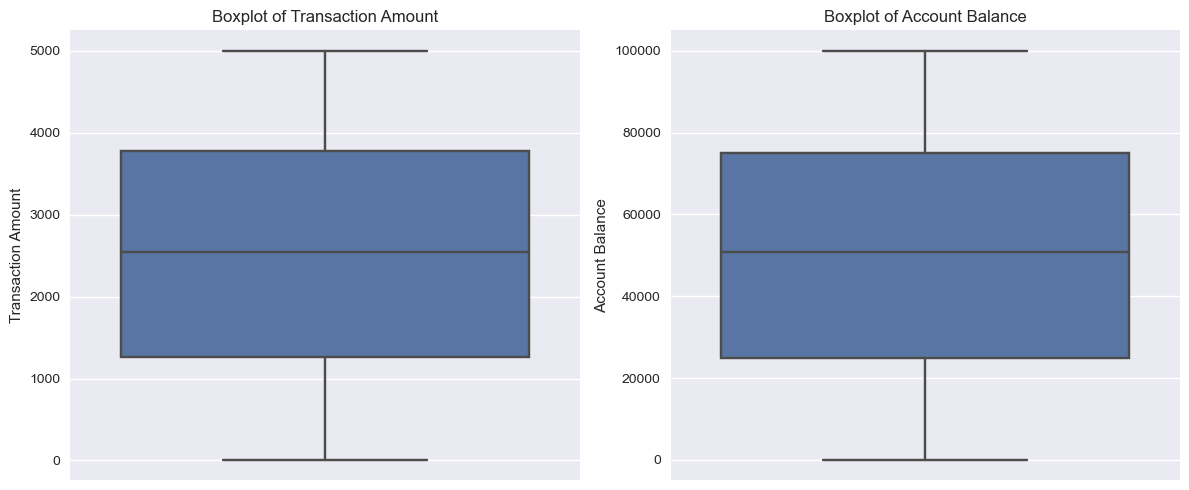

In [1326]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Transaction Amount'])
plt.title('Boxplot of Transaction Amount')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Account Balance'])
plt.title('Boxplot of Account Balance')
plt.tight_layout()
plt.show()

**Nie ma widocznych żadnych outlierów.**

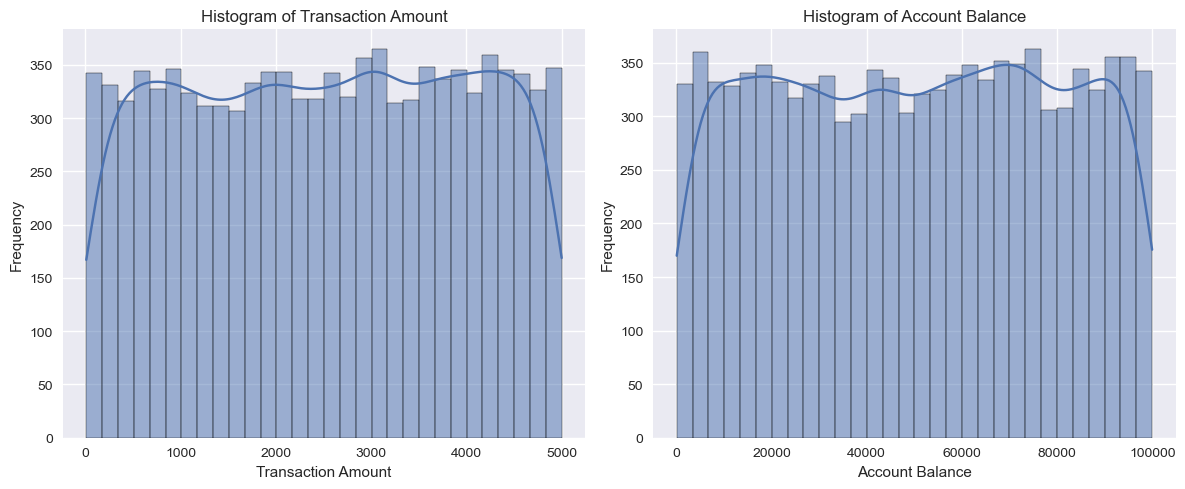

In [1327]:
plt.figure(figsize=(12, 5))

# Transaction amount
plt.subplot(1, 2, 1)
sns.histplot(df['Transaction Amount'], bins=30, kde=True)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Acc balance
plt.subplot(1, 2, 2)
sns.histplot(df['Account Balance'], bins=30, kde=True)
plt.title('Histogram of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

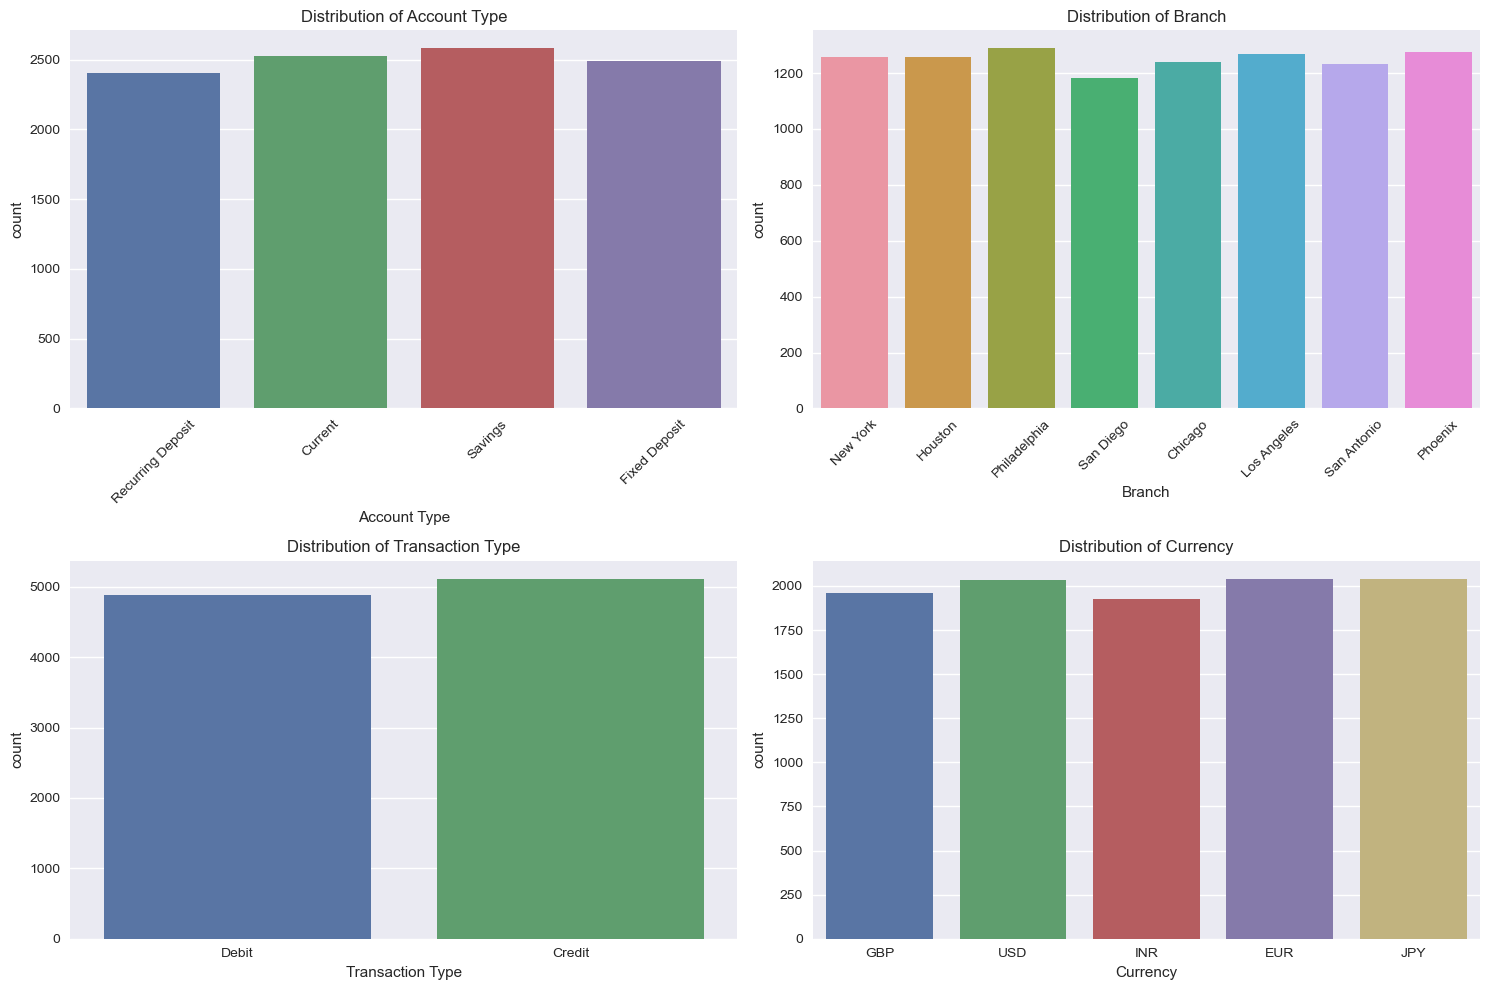

In [1328]:
# Count plots for categorical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Account Type', data=df)
plt.title('Distribution of Account Type')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='Branch', data=df)
plt.title('Distribution of Branch')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(x='Transaction Type', data=df)
plt.title('Distribution of Transaction Type')

plt.subplot(2, 2, 4)
sns.countplot(x='Currency', data=df)
plt.title('Distribution of Currency')
plt.tight_layout()
plt.show()


Dla każdej zmiennej kategorycznej zliczenia możliwych wartości są rozłożone mniej więcej po równo.

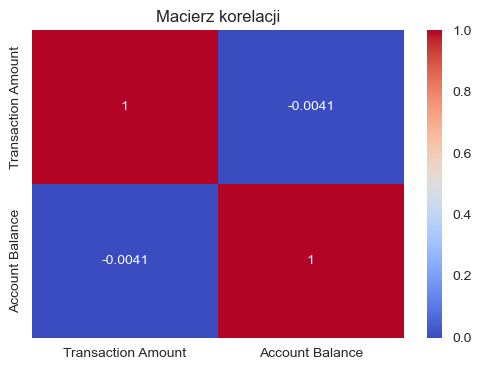

In [1329]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

Pomiędzy zmiennymi numerycznymi nie zachodzi korelacja

In [1330]:
print(df.groupby('Account Type')['Transaction Amount'].mean())

print(df.groupby('Currency')['Account Balance'].mean())


Account Type
Current              2502.820059
Fixed Deposit        2546.617151
Recurring Deposit    2512.312627
Savings              2536.010089
Name: Transaction Amount, dtype: float64
Currency
EUR    50502.715473
GBP    49906.100516
INR    51049.621271
JPY    49827.480314
USD    50091.525027
Name: Account Balance, dtype: float64


Nie widać na piewrszy rzut oka żadnej zależności pomiędzy średnią wartością transakcji/stanem konta a walutą w jakiej prowadzone jest konto

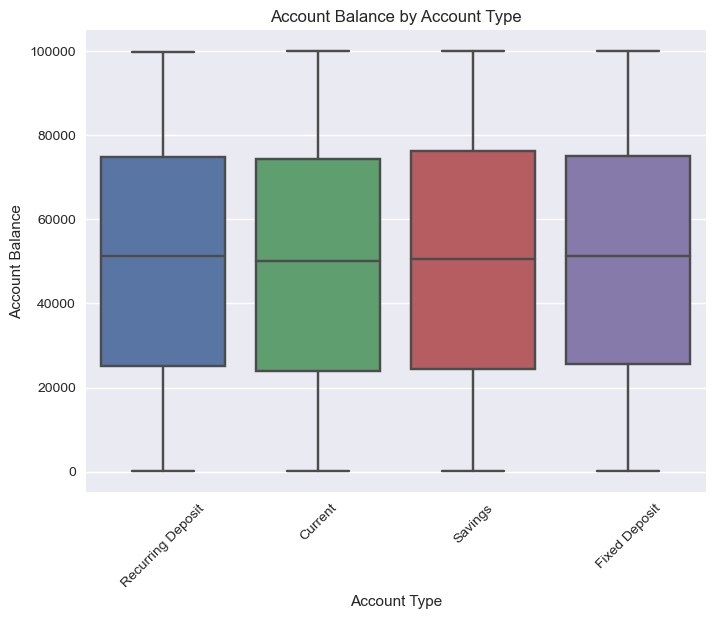

In [1331]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Account Type', y='Account Balance', data=df)
plt.title('Account Balance by Account Type')
plt.xticks(rotation=45)
plt.show()

Brak outlierów. Rozkład stanu konta w zależności od typu konta

In [1332]:
# Cross-tabulation of Account Type and Transaction Type
print(pd.crosstab(df['Account Type'], df['Transaction Type']))

Transaction Type   Credit  Debit
Account Type                    
Current              1323   1206
Fixed Deposit        1266   1223
Recurring Deposit    1206   1196
Savings              1319   1261


Po równo.

# **Inżynieria cech**

## **Zamiana na jedną walutę i ponowne przeprowadzenie analizy**

In [1333]:
exchange_rates = {'USD': 1.0, 'EUR': 1.08, 'GBP': 1.27, 'INR': 0.012, 'JPY': 0.0066}

# Zamiana na USD
df['Transaction Amount USD'] = df.apply(lambda x: float(x['Transaction Amount']) * exchange_rates.get(x['Currency'], 1.0), axis=1)
df['Account Balance USD'] = df.apply(lambda x: float(x['Account Balance']) * exchange_rates.get(x['Currency'], 1.0), axis=1)

# sprawdzamy czy dizała
print(df[['Transaction Amount USD', 'Account Balance USD']].describe())


       Transaction Amount USD  Account Balance USD
count            10000.000000         10000.000000
mean              1704.556596         33910.047464
std               1870.159242         37213.913721
min                  0.082434             0.897336
25%                 26.736683           535.726967
50%                950.329000         18802.265000
75%               3277.854375         65177.548200
max               6347.510800        126968.999300


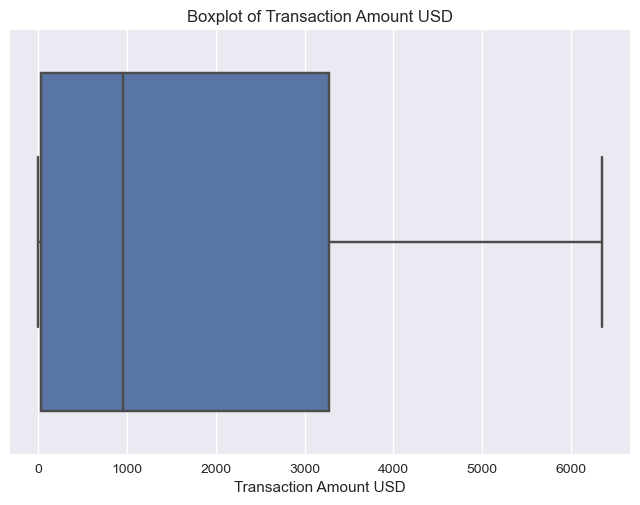

In [1334]:
sns.boxplot(x=df['Transaction Amount USD'])
plt.title('Boxplot of Transaction Amount USD')
plt.show()

brak outlierów

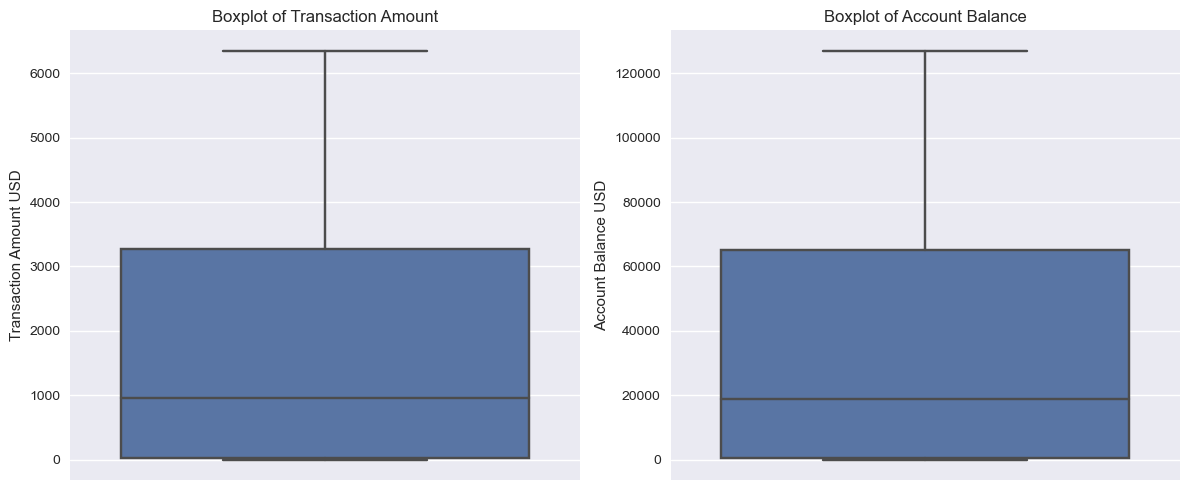

In [1335]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Transaction Amount USD'])
plt.title('Boxplot of Transaction Amount')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Account Balance USD'])
plt.title('Boxplot of Account Balance')
plt.tight_layout()
plt.show()

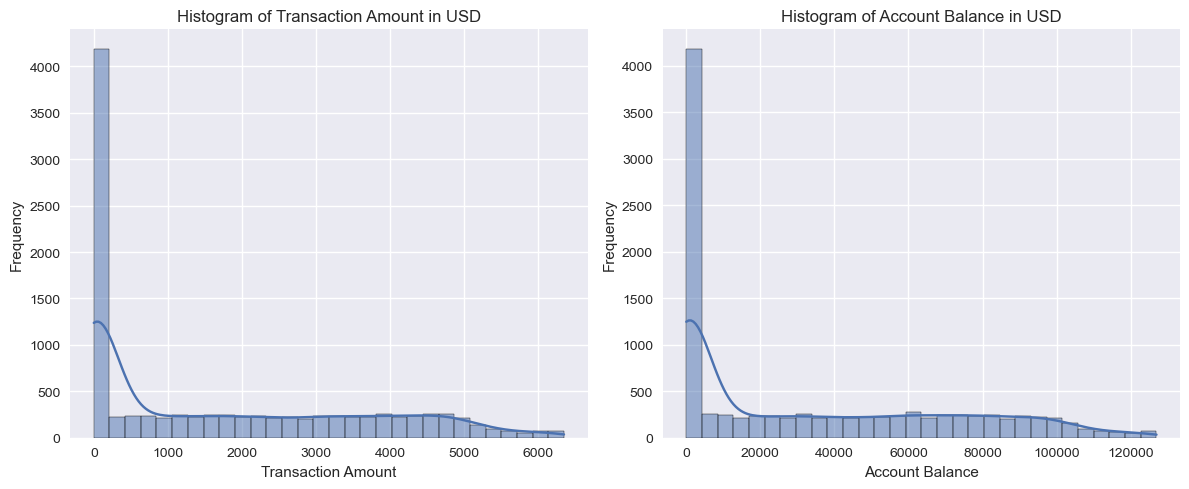

In [1336]:
plt.figure(figsize=(12, 5))

# Histogram dla Transaction Amount
plt.subplot(1, 2, 1)
sns.histplot(df['Transaction Amount USD'], bins=30, kde=True)
plt.title('Histogram of Transaction Amount in USD')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Histogram dla Account Balance
plt.subplot(1, 2, 2)
sns.histplot(df['Account Balance USD'], bins=30, kde=True)
plt.title('Histogram of Account Balance in USD')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bardzo mocna skośność, można rozważyć logarytmowanie - lub wykluczenie zmiennej (nwm)

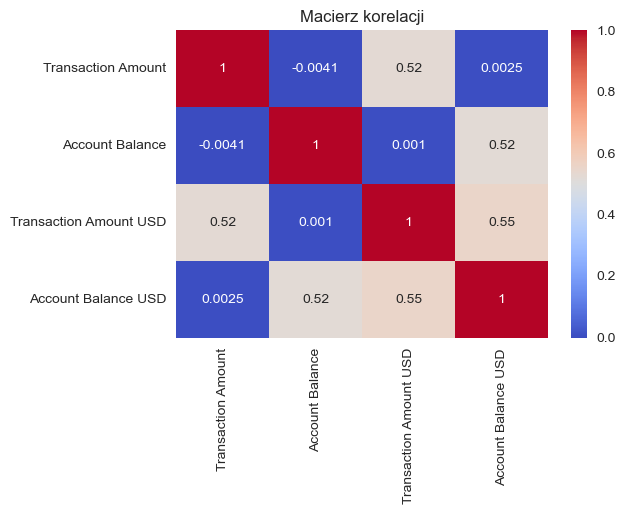

In [1337]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

**Przeskalowanie wartości** dla wartości numerycznych sprowadzając wszystko do jednej waluty daje ciekawe informacje. Jednak mimo wszystko wydaje się, że może być to mało wartościowa zmienna.

## Nowa zmienna

In [1338]:
df['Balance_to_Transaction_Ratio'] = df['Account Balance'] / df['Transaction Amount']

może być wrażliwe na outliery

Text(0, 0.5, 'Frequency')

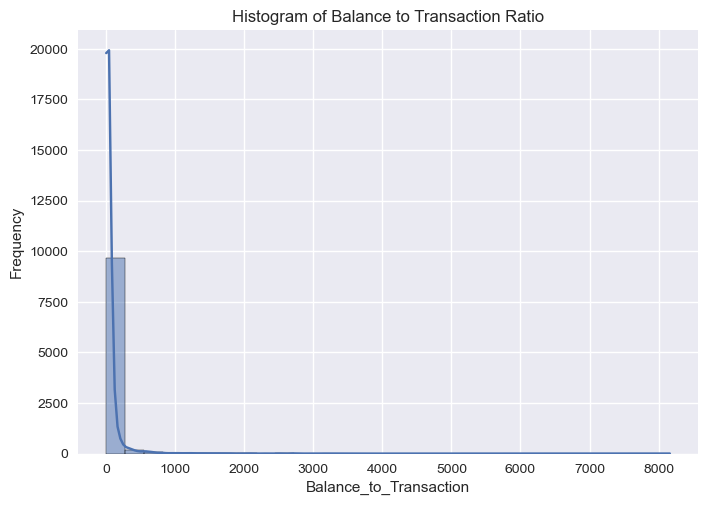

In [1339]:
sns.histplot(df['Balance_to_Transaction_Ratio'], bins=30, kde=True)
plt.title('Histogram of Balance to Transaction Ratio')
plt.xlabel('Balance_to_Transaction')
plt.ylabel('Frequency')

In [1340]:
df['Log_Balance_to_Transaction_Ratio'] = np.log1p(df['Balance_to_Transaction_Ratio'].clip(lower=1e-6))

Text(0, 0.5, 'Frequency')

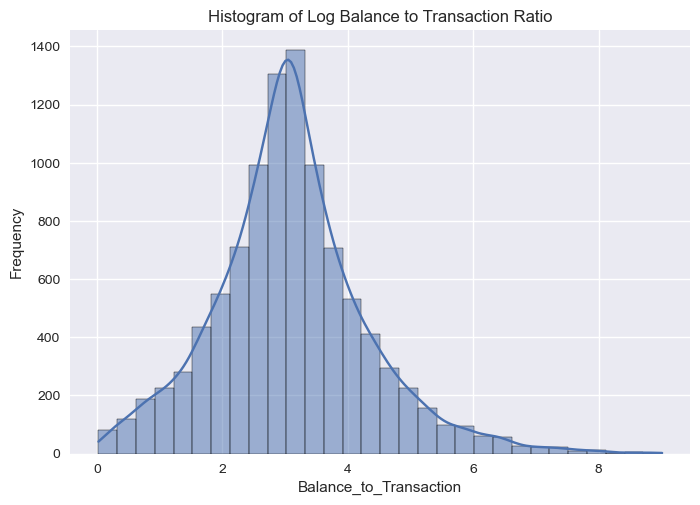

In [1341]:
sns.histplot(df['Log_Balance_to_Transaction_Ratio'], bins=30, kde=True)
plt.title('Histogram of Log Balance to Transaction Ratio')
plt.xlabel('Balance_to_Transaction')
plt.ylabel('Frequency')

In [1342]:
print(df[df['Account Balance USD'] < 0].shape)  
print(df[df['Transaction Amount USD'] <= 0].shape)  

(0, 10)
(0, 10)


brak ujemnych sald

Zmiana zmiennych kategorycznych

In [1343]:
df['Transaction Type'] = df['Transaction Type'].map({'Debit': 0, 'Credit': 1})

In [1344]:
df['Activity_Ratio'] = df['Transaction Amount USD'] / (df['Account Balance USD'] + 1)

Zmienne odpowiadające za to czy ktoś robi więcej dużych czy mniej transakcji (też poproszę o opinię)

In [1345]:
df['Account_Type_Original'] = df['Account Type'].copy()
df = pd.get_dummies(df, columns=['Account Type'], prefix='Account_Type')
df['Transaction_Amount_Relative_to_Mean'] = df['Transaction Amount USD'] / df.groupby('Account_Type_Original')['Transaction Amount USD'].transform('mean')
df = df.drop('Account_Type_Original', axis=1)

In [1346]:
df = pd.get_dummies(df, columns=['Currency'], prefix='Currency')

In [1347]:
df['Log_Activity_Ratio'] = np.log1p(df['Activity_Ratio'].clip(lower=1e-6))

In [1348]:
df.describe()

,Transaction Type,Transaction Amount,Account Balance,Transaction Amount USD,Account Balance USD,Balance_to_Transaction_Ratio,Log_Balance_to_Transaction_Ratio,Activity_Ratio,Transaction_Amount_Relative_to_Mean,Log_Activity_Ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.511400,2524.564298,50269.794260,1704.556596,33910.047464,61.379967,3.093531,0.165080,1.000000,0.108222
std,0.499895,1444.318039,29057.726646,1870.159242,37213.913721,252.298729,1.220871,0.812966,1.097227,0.219163
min,0.000000,10.970000,101.890000,0.082434,0.897336,0.026799,0.026447,0.000122,0.000049,0.000122
25%,0.000000,1263.912500,24863.487500,26.736683,535.726967,9.917744,2.390389,0.025280,0.015712,0.024966
50%,1.000000,2544.655000,50790.475000,950.329000,18802.265000,19.914487,3.040442,0.050167,0.556743,0.048949
75%,1.000000,3781.757500,75128.187500,3277.854375,65177.548200,39.532359,3.702101,0.100687,1.922764,0.095935
max,1.000000,4999.790000,99975.590000,6347.510800,126968.999300,8163.276436,9.007523,36.978318,3.758784,3.637015


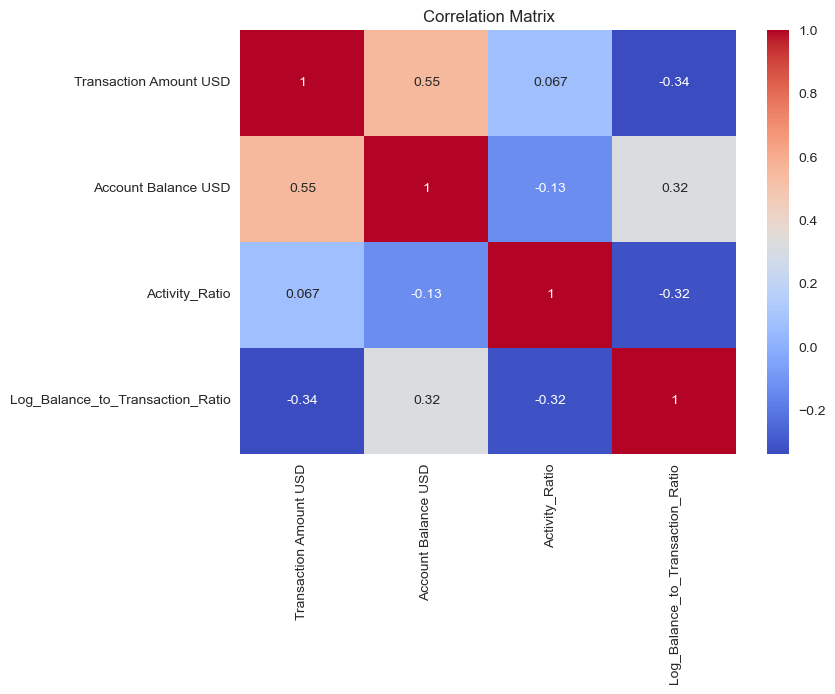

In [1349]:
correlation_matrix = df[['Transaction Amount USD', 'Account Balance USD', 'Activity_Ratio', 'Log_Balance_to_Transaction_Ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1350]:
df.describe()

,Transaction Type,Transaction Amount,Account Balance,Transaction Amount USD,Account Balance USD,Balance_to_Transaction_Ratio,Log_Balance_to_Transaction_Ratio,Activity_Ratio,Transaction_Amount_Relative_to_Mean,Log_Activity_Ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.511400,2524.564298,50269.794260,1704.556596,33910.047464,61.379967,3.093531,0.165080,1.000000,0.108222
std,0.499895,1444.318039,29057.726646,1870.159242,37213.913721,252.298729,1.220871,0.812966,1.097227,0.219163
min,0.000000,10.970000,101.890000,0.082434,0.897336,0.026799,0.026447,0.000122,0.000049,0.000122
25%,0.000000,1263.912500,24863.487500,26.736683,535.726967,9.917744,2.390389,0.025280,0.015712,0.024966
50%,1.000000,2544.655000,50790.475000,950.329000,18802.265000,19.914487,3.040442,0.050167,0.556743,0.048949
75%,1.000000,3781.757500,75128.187500,3277.854375,65177.548200,39.532359,3.702101,0.100687,1.922764,0.095935
max,1.000000,4999.790000,99975.590000,6347.510800,126968.999300,8163.276436,9.007523,36.978318,3.758784,3.637015


Czy wywalamy kolumnę Branch?

## NOTATNIK WRZUCONY DO CHATA I ZEBY ZROBIL COKOLWIEK WIEC NWM CO TO ALE COS ROBI WIEC ZOSTAWIAM XD

In [1351]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Transaction Amount USD', 'Account Balance USD', 'Activity_Ratio', 'Log_Balance_to_Transaction_Ratio', 'Transaction_Amount_Relative_to_Mean']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

c:\Users\48530\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\48530\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\48530\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\48530\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

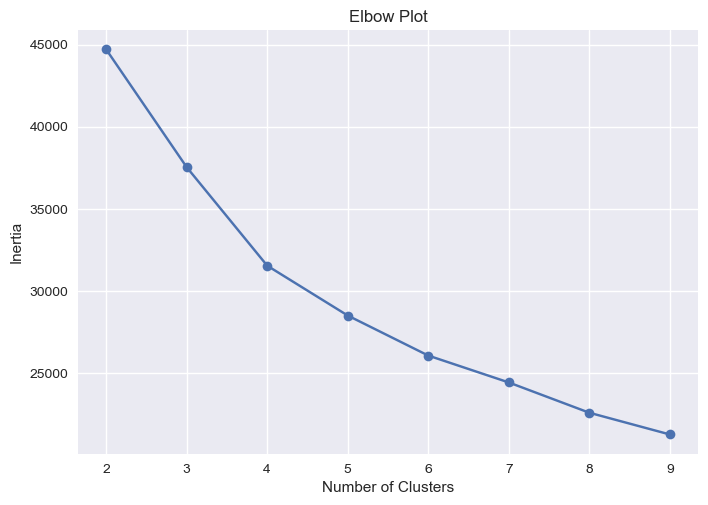

c:\Users\48530\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1352]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Wybór cech do klasteryzacji
features = ['Transaction Amount USD', 'Account Balance USD', 'Activity_Ratio', 'Log_Balance_to_Transaction_Ratio', 'Transaction_Amount_Relative_to_Mean'] + \
           [col for col in df.columns if col.startswith('Account_Type_') or col.startswith('Currency_')]

# Określenie optymalnej liczby klastrów
inertias = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df[features], kmeans.labels_))

# Wykres elbow
plt.plot(range(2, 10), inertias, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Klasteryzacja z wybraną liczbą klastrów
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

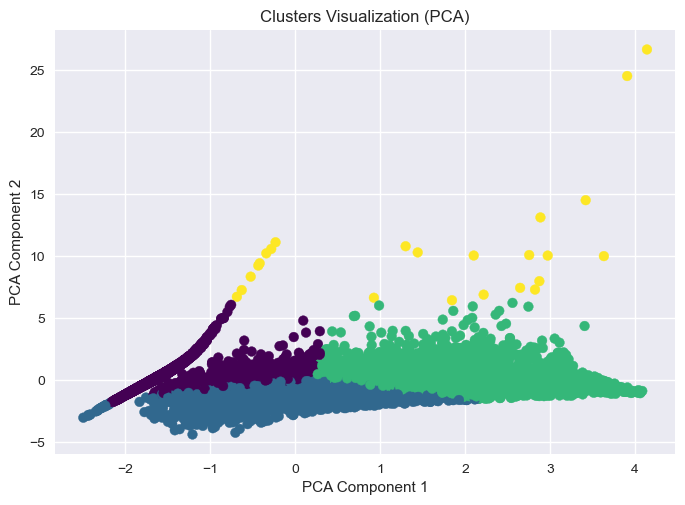

In [1353]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

+ NIE WYGLĄDA ŹLE (chyba, bo nwm co sie dzieje w tym kodzie)

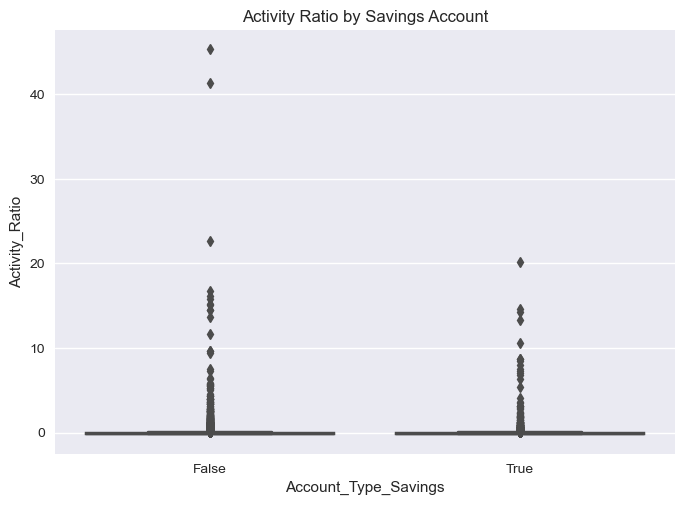

In [1354]:
sns.boxplot(x='Account_Type_Savings', y='Activity_Ratio', data=df)
plt.title('Activity Ratio by Savings Account')
plt.show()

In [1355]:
silhouette_avg = silhouette_score(df[features], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2938502721891494
